### Linear regression
 make predictions, visualize the model fit, and analyze the formula used to generate your fit.

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
weather = pd.read_csv('weatherAUS.csv')

#### Prepare your data
Do I have any null values in my dataset

In [145]:
any(weather.isnull())
# For numpy
# np.any(np.isnan(mat))
# np.all(np.isfinite(mat))

True

In [155]:
#weather = weather.fillna(method='ffill') # inpute missing values
weather.dropna(inplace=True) # drop raws with null values, can loose important information
weather_train = weather.sample(n=100) 
weather_test = weather.sample(n=1000)

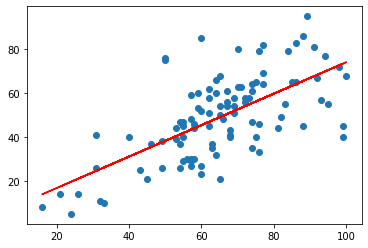

Coefficient: [0.72]


In [156]:
weather = weather_train
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
X = np.array(weather['Humidity9am']).reshape(-1,1)
y = weather['Humidity3pm']


# Create and fit your linear regression model
lm = LinearRegression()
lm.fit(X, y)

# Assign and print predictions
preds = lm.predict(X)

# Plot your fit to visualize your model
plt.scatter(X, y)
plt.plot(X, preds, color='red')
plt.show()

# Assign and print coefficient 
coef = lm.coef_
print(f'Coefficient: {np.round(coef,2)}')

This means that for every 1 unit of humidity in the morning, we can expect about 0.71 units of humidity in the afternoon. More practically, this information tells us that humidity drops about 29% from morning to afternoon!

In [157]:
# R-squared score
r2 = lm.score(X,y)
print(f'R-squared score: {r2:.2f}')

# Mean squared error
from sklearn.metrics import mean_squared_error
preds = lm.predict(X)
mse = mean_squared_error(y, preds)
print(f'Mean squared error: {mse:.2f}')

# Mean absolute error
from sklearn.metrics import mean_absolute_error
preds = lm.predict(X)
mae = mean_absolute_error(y, preds)
print(f'Mean absolute error: {mae:.2f}')

R-squared score: 0.43
Mean squared error: 210.46
Mean absolute error: 11.54


Note that our R-squared value tells us the percentage of the variance of y that X is responsible for. Which error metric would you recommend for this dataset? If you remember from when you plotted your model fit, there aren't too many outliers, so mean squared error would be a good choice to go with!

##### Bias-Variance tradeoff

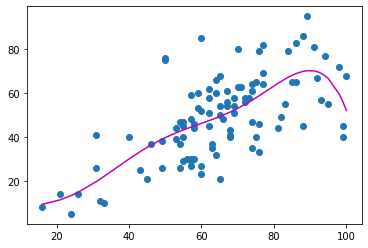

R-squared score: 1.00


In [172]:
import operator
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=10)

x_poly = polynomial_features.fit_transform(X)

lm2 = LinearRegression()
lm2.fit(x_poly, y)
preds2 = lm2.predict(x_poly)


plt.scatter(X, y)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,preds2), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()


# R-squared score
r2 = lm2.score(x_poly, preds2)
print(f'R-squared score: {r2:.2f}')


## Logistic regression

In [130]:
import pandas as pd
from sklearn import preprocessing 
def scaleX(df):
    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    return pd.DataFrame(x_scaled)

In [131]:
X_train = np.array(scaleX(weather_train.loc[:,['Humidity9am','Humidity3pm']])).reshape(-1,2)
y_train = np.array(weather_train['RainTomorrow'])
y_train = (y_train=='Yes').astype(int)

In [132]:
X_test = np.array(scaleX(weather_test.loc[:,['Humidity9am','Humidity3pm']])).reshape(-1,2)
y_test = np.array(weather_test['RainTomorrow'])
y_test = (y_test=='Yes').astype(int)

In [133]:
from sklearn.linear_model import LogisticRegression
# Create and fit your model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Compute and print the accuracy
acc = clf.score(X_test, y_test)
print(f'Accuracy: {np.round(acc,2)}')

# Assign and print the coefficents
coefs = clf.coef_
print(f'Coefficient: {np.round(coefs,2)}')

Accuracy: 0.83
Coefficient: [[0.05 6.81]]


Since our features were normalized beforehand, we can look at the magnitude of our coefficients to tell us the importance of each independent variable. Here you can see the the second variable, Humidity3pm was much more important to our outcome than humidity from that morning. This is intuitive since we are trying to predict the rain for tomorrow!

In [134]:
# Generate and output the confusion matrix
from sklearn.metrics import confusion_matrix
preds = clf.predict(X_test)
matrix = confusion_matrix(y_test, preds)
print(f'Confusion matrix: {np.round(matrix,2)}')

# Compute and print the precision
from sklearn.metrics import precision_score
preds = clf.predict(X_test)
precision = precision_score(y_test, preds)
print(f'Precision: {np.round(precision,2)}')

# Compute and print the recall
from sklearn.metrics import recall_score
preds = clf.predict(X_test)
recall = recall_score(y_test, preds)
print(f'Recall: {np.round(recall,2)}')

Confusion matrix: [[7508  262]
 [1440  790]]
Precision: 0.75
Recall: 0.35


You can see here that the precision of our rain prediction model is higher, meaning that we didn't make too many Type I errors. However, there were plenty of Type II errors shown in the bottom-left quadrant of the confusion matrix. This is indicated further by the low recall score, meaning that there were plenty of rainy days that we missed out on. 